# 파일

In [1]:
import pandas as pd

In [4]:
서울=pd.read_excel('서울 자치행정기관 이상치.xlsx',index_row=0)
서울=서울[['파일이름']]
서울.head(5)

,파일이름
0,서울특별시 기상 정보
1,서울특별시 유동인구 현황
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)


In [23]:
강원=pd.read_excel('강원 자치행정기관 이상치.xlsx',index_row=0)
강원=강원[['파일이름']]

In [24]:
경기=pd.read_excel('경기 자치행정기관 이상치.xlsx',index_row=0)
경기=경기[['파일이름']]

In [25]:
경남=pd.read_excel('경남 자치행정기관 이상치.xlsx',index_row=0)
경남=경남[['파일이름']]

In [26]:
경북=pd.read_excel('경북 자치행정기관 이상치.xlsx',index_row=0)
경북=경북[['파일이름']]

In [27]:
광주=pd.read_excel('광주 자치행정기관 이상치.xlsx',index_row=0)
광주=광주[['파일이름']]

In [28]:
대구=pd.read_excel('대구 자치행정기관 이상치.xlsx',index_row=0)
대구=대구[['파일이름']]

In [29]:
대전=pd.read_excel('대전 자치행정기관 이상치.xlsx',index_row=0)
대전=대전[['파일이름']]

In [30]:
부산=pd.read_excel('부산 자치행정기관 이상치.xlsx',index_row=0)
부산=부산[['파일이름']]

In [31]:
세종=pd.read_excel('세종 자치행정기관 이상치.xlsx',index_row=0)
세종=세종[['파일이름']]

In [32]:
인천=pd.read_excel('인천 자치행정기관 이상치.xlsx',index_row=0)
인천=인천[['파일이름']]

In [33]:
전남=pd.read_excel('전남 자치행정기관 이상치.xlsx',index_row=0)
전남=전남[['파일이름']]

In [34]:
전북=pd.read_excel('전북 자치행정기관 이상치.xlsx',index_row=0)
전북=전북[['파일이름']]

In [35]:
충남=pd.read_excel('충남 자치행정기관 이상치.xlsx',index_row=0)
충남=충남[['파일이름']]

In [36]:
충북=pd.read_excel('충북 자치행정기관 이상치.xlsx',index_row=0)
충북=충북[['파일이름']]

In [37]:
제주=pd.read_excel('제주 자치행정기관 이상치.xlsx',index_row=0)
제주=제주[['파일이름']]

In [38]:
울산=pd.read_excel('울산 자치행정기관 이상치.xlsx',index_row=0)
울산=울산[['파일이름']]

In [39]:
korea_wc=pd.concat([서울, 강원, 경기, 경남, 경북, 광주, 대구, 대전, 
                    부산, 세종, 울산, 인천, 전남, 전북, 제주, 충남, 충북],
                 )
korea_wc

,파일이름
0,서울특별시 기상 정보
1,서울특별시 유동인구 현황
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)
...,...
61,충청북도 단양군_사업장폐기물배출자 신고현황
62,충청북도 청주시_지정약수터정보
63,충청북도 진천군_사업장폐기물 신고현황
64,충청북도 괴산군_사업장폐기물배출자신고사업장현황


In [42]:
korea_wc.to_excel('korea_wc.xlsx')

# 워드클라우드

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import platform
from konlpy.tag import Okt
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [46]:
korea=pd.read_excel('korea_wc.xlsx',index_row=0)
korea.head(5)

,Unnamed: 0,파일이름
0,0,서울특별시 기상 정보
1,1,서울특별시 유동인구 현황
2,2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,3,서울특별시 숙박업소 정보(수시)
4,4,서울시 5대 범죄 발생현황 통계 (연간)


In [47]:
korea_file=list(korea['파일이름'])

In [106]:
stop_words = '''서울특별시 현황 경기도 인천광역시 부산광역시 대구광역시 
전라북도 충청북도 광주 동구 경상북도 경상남도 충청남도 광역시 전라남도 
강원도 양천구 제주 특별자치도 포천시 서울시 울산 별 서구 미추홀 서대문구 
대전광역시 전라북도 마포구 광진구 성동구 안산시 도봉구 중구 동작구 통영시 
계양구 군산시 남구 광진구 기장군 성주군 업 폐 대전광역시 강원도 구 김포시
 토 통영시 소 구 양주시 점 창원시 당진시 사하구 및 성남시 통계 동대문구 
 포항시 김포시 함 굉산구 목록 관련 부평구 계양구 데이터 군위군 정보 공주시
  양평군 밀양시 여수시 북구 가정우 남양군 담양군 중랑구 전주시 수시 강서구 
   공주시 양산시 착 광산구 '''
stop_words = stop_words.split(' ')

In [107]:
def wordcloudf2(list):
    okt=Okt()
    morphs=[]

    for sentence in list:
        morphs.append(okt.pos(sentence))
        
    noun_list=[]

    for i in morphs:
        for word, tag in i:
            if word not in stop_words:
                if tag in['Noun']:
                    noun_list.append(word)
                
    count=Counter(noun_list)

    words=dict(count.most_common(100))
    
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color = 'white', 
                      width=800, height=600).generate_from_frequencies(words) 

    plt.figure(figsize=(15,10))
    plt.axis('off') 
    plt.imshow(wordcloud)
    return plt.show()

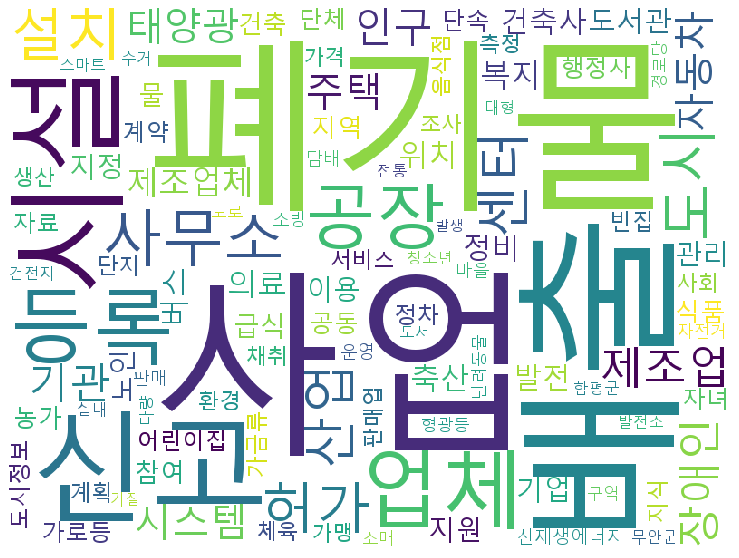

In [108]:
wordcloudf2(korea_file)